<h3>Doing real-data regression using sklearn tools</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Applied ML learning\Linear_regression\train.csv')

X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.3, random_state=0)

In [ ]:
X_train = (
    X_train
    .reset_index().drop('index',axis=1)
    .select_dtypes(exclude=['object'])
    .drop('Id',axis=1)
    .drop('SalePrice',axis=1)
)

In [ ]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

In [ ]:
X_test = (
    X_test
    .reset_index().drop('index',axis=1)
    .select_dtypes(exclude=['object'])
    .drop('Id',axis=1)
    .drop('SalePrice',axis=1)
)

In [ ]:
imputer = SimpleImputer(strategy='median')
X_test = imputer.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
reg.score(X_test, y_test)

<H3>Developing of my own linear regression algorithm</H3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Applied ML learning\Linear_regression\train.csv')

X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.3, random_state=0)

X_train = X_train['LotArea']
X_test = X_test['LotArea']

In [165]:
class MultivariateRegression:
    def __init__(self):
        # TODO: finish regression analysis part
        self.score = 0
        self.coeffs = 0
        self.residuals = 0

        self.slope = 0
        self.intercept = 0

    def fit(self, X, y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        self.residuals = sum([value - y_mean for value in y])

        N = len(X)

        SSxy = (sum([xi*yi for (xi,yi) in zip(X,y)]) - sum(X)*sum(y)) / N

        SSxx = sum(X)**2 - (sum(X)**2)/2
        self.slope = SSxy/SSxx

        self.intercept = y_mean - self.slope*x_mean

        self.score = 1 - (sum([(yi - self.predict(yi))**2 for yi in y]) / \
                         sum(([(yi - y_mean)**2 for yi in y])))
        self.coeffs = (self.intercept, self.slope)

    def fit_multi(self, X_all, y):
        # TODO: how mony iterations should be done and what defines model's goodness?
        # what is loop's condition to stop iteration process?
        # how to reduce error? learning rate? how to change parameters during fitting?
        for column in X_all.T:
            X = column
            
            x_mean = np.mean(X)
            y_mean = np.mean(y)

            self.residuals = sum([value - y_mean for value in y])

            n = len(X)

            SSxy = (sum([X[i]*y[i] for i in range(len(X))]) - sum([xi for xi in X])*sum([yi for yi in y])) / n
            SSxx = sum([xi for xi in X])**2 - (sum([xi for xi in X])**2)/2
            self.slope = SSxy/SSxx

            self.intercept = y_mean - self.slope*x_mean
            
            self.score  = 1 - (sum([(yi - self.predict(yi)[0])**2 for yi in y]) / sum(([(yi - y_mean)**2 for yi in y])))
            self.coeffs = (self.intercept, self.slope)
    
    def predict(self, *X):
        if type(X[0]) == pd.Series:
            X = X[0]
            y_pred = pd.Series([(self.slope*xi)+self.intercept for xi in X])
        
        y_pred = [(self.slope*xi+self.intercept) for xi in X]
        return y_pred[0]


    '''def fit(self, X, y):
        for i in range(X.shape[1]):
            xy = [X.iloc[:,i].values.iloc[:,i]*y.iloc[:,i].values.iloc[:,i] for i in range(len(X.iloc[:,i].values))]
            x_squared = [x[0]**2 for x in X.iloc[:,i].values]
            n = len(X.values)

            m = (n*sum(xy)-sum(X.iloc[:,i].values)*sum(y.iloc[:,i].values))/(n*sum(x_squared)-(sum(X.iloc[:,i].values)**2))
            b = ((sum(y.iloc[:,i].values)-m*sum(X.iloc[:,i].values))/n)

            y = [(m*x[0]+b) for x in X.iloc[:,i].values]

        return y'''

    '''def gradient_descent(x_actual, x_pred, intercept, slope, L=0.01):
        old_intercept = -2(x_actual + (x_pred*slope + intercept))
        step_size = old_intercept*L
        new_intercept = old_intercept-step_size

        step_size_limit = 0.001
        step_num_limit  = 1000
        if step_size >= step_size_limit & 0 >= step_num_limit:
            pass
       
        return 0'''

'''df_sum = lambda X: sum([xi for xi in X])
    SSxy = (sum([xi*yi for (xi,yi) in zip(X,y)]) -
            df_sum(X)*df_sum(y)) / n'''

'df_sum = lambda X: sum([xi for xi in X])\n    SSxy = (sum([xi*yi for (xi,yi) in zip(X,y)]) -\n            df_sum(X)*df_sum(y)) / n'

In [ ]:
myreg = MultivariateRegression()
#myreg.fit_multi(X_train, y_train)

X_all = X_train
y = y_train

def predict(*X):
    if type(X[0]) == pd.Series:
        X = X[0]
        y_pred = pd.Series([(slope*xi)+intercept for xi in X])

    y_pred = [(slope*xi+intercept) for xi in X]
    return y_pred

slope, intercept, residuals = [0, 0, 0]
for column in X_all.T:
    X = column

    x_mean = np.mean(X)
    y_mean = np.mean(y)

    residuals = sum([value - y_mean for value in y])

    N = len(X)

    SSxy = (sum([xi*yi for (xi,yi) in zip(X,y)]) - sum(X)*sum(y)) / N

    SSxx = sum(X)**2 - (sum(X)**2)/2
    slope = SSxy/SSxx

    intercept = y_mean - slope*x_mean

    score = 1 - (sum([(yi - predict(yi)[0])**2 for yi in y]
                     ) / sum(([(yi - y_mean)**2 for yi in y])))
    coeffs = (intercept, slope)

In [ ]:
pred = predict(X_train.T[1])[0]

plt.scatter(X_train.T[1], y_train)
plt.plot(X_train.T[1], pred, c='red')

In [ ]:
y_pred = myreg.predict(X_test)
'''
plt.scatter(X_test, y_test, alpha=0.2)
plt.plot(X_test, y_pred, c='red')
plt.xlabel('X_test')
plt.ylabel('Y_pred')
plt.show()
myreg.score'''

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Applied ML learning\Linear_regression\Data.csv')
df = df[df['Price_house'] < 100000000]
X_train, X_test, y_train, y_test = train_test_split(df.Rainfall.values.reshape(-1,1), df.Price_house, train_size=0.7, random_state=0)

array([5951696.98253718])

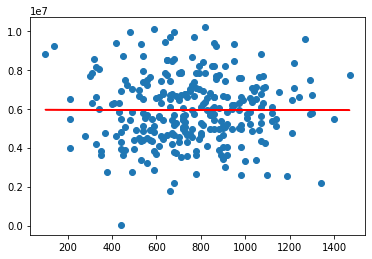

In [168]:
myreg = MultivariateRegression()
myreg.fit(X_train, y_train)
y_pred = myreg.predict(X_test)

plt.scatter(X_test, y_test,)
plt.plot(X_test, y_pred, c='r')
myreg.intercept

5855411.836952145

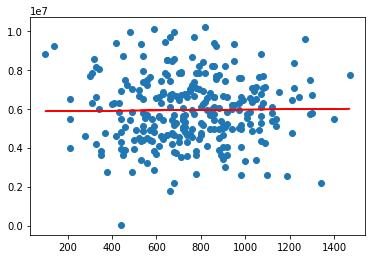

In [167]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(X_test, y_test,)
plt.plot(X_test, y_pred, c='r')
reg.intercept_

<h3>Difference in intercepts<br>
mine is 1.64% worse</h3>

<h3>

In [177]:
abs(myreg.intercept - reg.intercept_) *100 /reg.intercept_

array([1.64437871])